In [1]:
# essential libraries
import random
from datetime import timedelta  

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap
import folium

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

In [2]:

full_table = pd.read_csv('D:\Jupyter Projects\covid_19_clean_complete.csv')
full_table.sample(6)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
2126,NaN,Lithuania,55.1694,23.8813,1/30/20,0,0,0
4707,Victoria,Australia,-37.8136,144.9631,2/10/20,4,0,0
2919,NaN,Sri Lanka,7.0000,81.0000,2/2/20,1,0,0
3579,NaN,Ghana,7.9465,-1.0232,2/5/20,0,0,0
2089,Saint Barthelemy,France,17.9000,-62.8333,1/30/20,0,0,0
2312,NaN,Cuba,22.0000,-80.0000,1/31/20,0,0,0


In [3]:
full_table = pd.read_csv('D:\Jupyter Projects\covid_19_clean_complete.csv', parse_dates=['Date']) # to get into date format  


#sample_table["month"].astype('datetime64[M]')



In [4]:
#dataframe info
full_table.info()
full_table.describe()[full_table.columns[5:8]] # describe confirmed deats and recovered 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16055 entries, 0 to 16054
Data columns (total 8 columns):
Province/State    4875 non-null object
Country/Region    16055 non-null object
Lat               16055 non-null float64
Long              16055 non-null float64
Date              16055 non-null datetime64[ns]
Confirmed         16055 non-null int64
Deaths            16055 non-null int64
Recovered         16055 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1003.5+ KB


,Confirmed,Deaths,Recovered
count,16055.000000,16055.000000,16055.000000
mean,435.497789,16.352102,144.815322
std,4139.044316,214.426702,2142.533470
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,20.000000,0.000000,1.000000
max,83836.000000,8215.000000,61201.000000


In [5]:
# checking total no missing value
print(full_table.isna().sum())


Province/State    11180
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [6]:
year_wanted=2020


#sample_table=full_table.sample(3)

sample_table=full_table

#print(sample_table)

#sample_table["month"]=sample_table["Date"].dt.to_period('M') # gives both month n year

print(pd.DatetimeIndex(sample_table['Date']).year)

# extract the year and month 
sample_table["year"]=pd.DatetimeIndex(sample_table['Date']).year
sample_table["month"]=pd.DatetimeIndex(sample_table['Date']).month 

# print(sample_table["year"].equals(year_wanted))


sample_table.info()
print(" \n\n")
print(sample_table.loc[sample_table['year'] == year_wanted])
sample_table.info()

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=16055)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16055 entries, 0 to 16054
Data columns (total 10 columns):
Province/State    4875 non-null object
Country/Region    16055 non-null object
Lat               16055 non-null float64
Long              16055 non-null float64
Date              16055 non-null datetime64[ns]
Confirmed         16055 non-null int64
Deaths            16055 non-null int64
Recovered         16055 non-null int64
year              16055 non-null int64
month             16055 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 1.2+ MB
 


                     Province/State          Country/Region        Lat  \
0                               NaN             Afghanistan  33.000000   
1                               NaN     

In [7]:
#Perform Grouping by months 
grp=sample_table.groupby('month')

print(grp["Confirmed"].sum())

month
1      38534
2    1673291
3    5280092
Name: Confirmed, dtype: int64


<BarContainer object of 16055 artists>

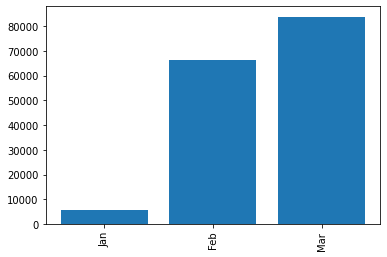

In [8]:
x = [0,1,2,3]
labels = ["start",'Jan', 'Feb', "Mar"]
#plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')

plt.bar(sample_table["month"], sample_table["Confirmed"])

<BarContainer object of 16055 artists>

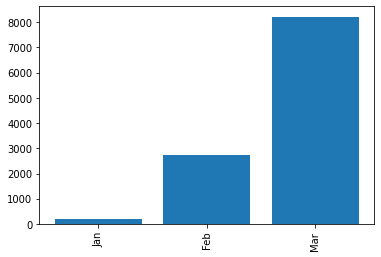

In [9]:
#plt.text(8,3,'This text ends at point (8,3)',horizontalalignment='right')

#plt.xticks(np.arange(1,4,1))

#plt.set_xticklabels(["Jan","Feb","Mar"])
x = [0,1,2,3]
labels = ["start",'Jan', 'Feb', "Mar"]
#plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')


plt.bar(sample_table["month"], sample_table["Deaths"])



<BarContainer object of 16055 artists>

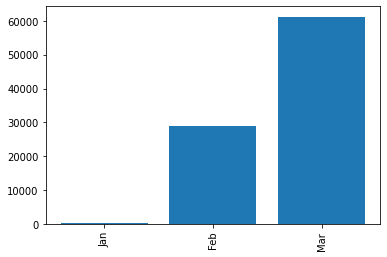

In [10]:
x = [0,1,2,3]
labels = ["start",'Jan', 'Feb', "Mar"]
#plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')

plt.bar(sample_table["month"], sample_table["Recovered"])

In [11]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('-')
full_table[cases] = full_table[cases].fillna(0)

# fixing datatypes
#print(full_table.info())
#full_table['Recovered'] = full_table['Recovered'].astype(int)
#print(full_table.info())

full_table.sample(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,year,month,Active
2241,-,Bahamas,25.0343,-77.3963,2020-01-31,0,0,0,2020,1,0
15773,-,Tunisia,34.0000,9.0000,2020-03-25,173,5,2,2020,3,166
11262,-,Lebanon,33.8547,35.8623,2020-03-07,22,0,1,2020,3,21
1942,-,Turkey,38.9637,35.2433,2020-01-29,0,0,0,2020,1,0
1959,-,Zimbabwe,-20.0000,30.0000,2020-01-29,0,0,0,2020,1,0
11876,-,Bangladesh,23.6850,90.3563,2020-03-10,3,0,0,2020,3,3
4224,-,Bhutan,27.5142,90.4336,2020-02-08,0,0,0,2020,2,0
9789,-,Mauritania,21.0079,10.9408,2020-03-01,0,0,0,2020,3,0
9592,-,Switzerland,46.8182,8.2275,2020-02-29,18,0,0,2020,2,18
4586,-,Jordan,31.2400,36.5100,2020-02-09,0,0,0,2020,2,0


In [12]:

country='China'

# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Country/Region'].str.contains('Diamond Princess')]

# china and the row
country_table = full_table[full_table['Country/Region']==country]
row = full_table[full_table['Country/Region']!=country]

# latest
#print(full_table.head())
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()   # last day in dataset 
#print(full_latest.head())
country_table_latest = full_latest[full_latest['Country/Region']==country]
#print(full_latest.head())
row_latest = full_latest[full_latest['Country/Region']!=country]

# latest condensed
print(full_latest)
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
print(full_latest_grouped)
country_latest_grouped = country_table_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

     index                Province/State          Country/Region        Lat  \
0    15808                             -             Afghanistan  33.000000   
1    15809                             -                 Albania  41.153300   
2    15810                             -                 Algeria  28.033900   
3    15811                             -                 Andorra  42.506300   
4    15812                             -                  Angola -11.202700   
5    15813                             -     Antigua and Barbuda  17.060800   
6    15814                             -               Argentina -38.416100   
7    15815                             -                 Armenia  40.069100   
8    15816  Australian Capital Territory               Australia -35.473500   
9    15817               New South Wales               Australia -33.868800   
10   15818            Northern Territory               Australia -12.463400   
11   15819                    Queensland            

   index  Country/Region  Confirmed  Deaths  Recovered  Active
0    163              US      83836    1209        681   81946
1     33           China      81782    3291      74181    4310
2     81           Italy      80589    8215      10361   62013
3    148           Spain      57786    4365       7015   46406
4     62         Germany      43938     267       5673   37998
5     58          France      29551    1698       4955   22898
6     77            Iran      29406    2234      10457   16715
7    167  United Kingdom      11812     580        150   11082
8    153     Switzerland      11811     191        131   11489
9    147     South Korea       9241     131       4144    4966


(-1660.2450575601113,
 1650.4878598838147,
 -1653.4596043452304,
 1666.8693007220202)

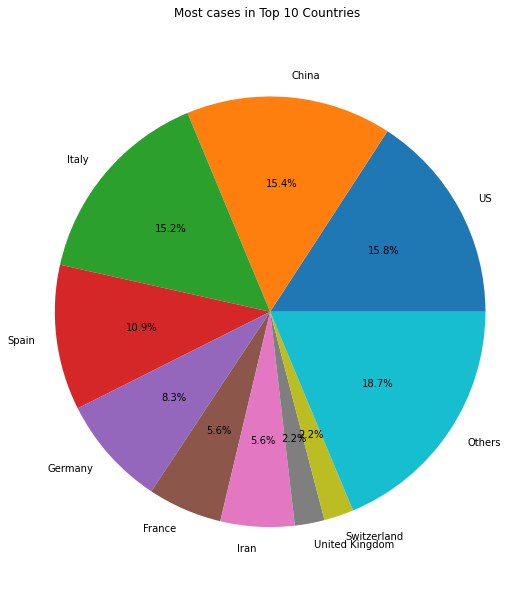

In [13]:
#Pie Charts


max_latest_country=full_latest_grouped.sort_values(by=["Confirmed"],ascending=[0]).reset_index()


confirmed_pie_val=[]
confirmed_pie_val[0:9]=max_latest_country["Confirmed"][0:9]
confirmed_pie_val.append(max_latest_country["Confirmed"][9:].sum())

confirmed_label_pie=[]
confirmed_label_pie[0:9]=max_latest_country["Country/Region"][0:9]
confirmed_label_pie.append("Others")

fig1,ax1=plt.subplots()
fig1.subplots_adjust(0.9,0,2,2)
plt.title("Most cases in Top 10 Countries ")
print(max_latest_country.head(10))
#print(max_latest_country)

ax1.pie(confirmed_pie_val,labels=confirmed_label_pie,autopct='%1.1f%%',radius=1500)
ax1.axis('equal')
# plt.show()




In [14]:
temp = full_table.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()
# temp.style.background_gradient(cmap='Reds')

In [15]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp['Global Moratality'] = temp['Deaths']/temp['Confirmed']
temp['Deaths per 100 Confirmed Cases'] = temp['Global Moratality']*100
temp.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active,Global Moratality,Deaths per 100 Confirmed Cases
0,2020-03-26 00:00:00,529591,23970,121966,383655,0.0452613,4.52613


2020-03-26
   index  Country/Region  Confirmed  Deaths  Recovered  Active
0    163              US      83836    1209        681   81946
1     81           Italy      80589    8215      10361   62013
2    148           Spain      57786    4365       7015   46406
3     62         Germany      43938     267       5673   37998
4     58          France      29551    1698       4955   22898
5     77            Iran      29406    2234      10457   16715
6    153     Switzerland      11811     191        131   11489
7    167  United Kingdom      11812     580        150   11082
8    114     Netherlands       7468     435          6    7027
9      9         Austria       6909      49        112    6748


(-1653.4683323429588,
 1650.1651674137283,
 -1651.4941917099804,
 1669.774246820978)

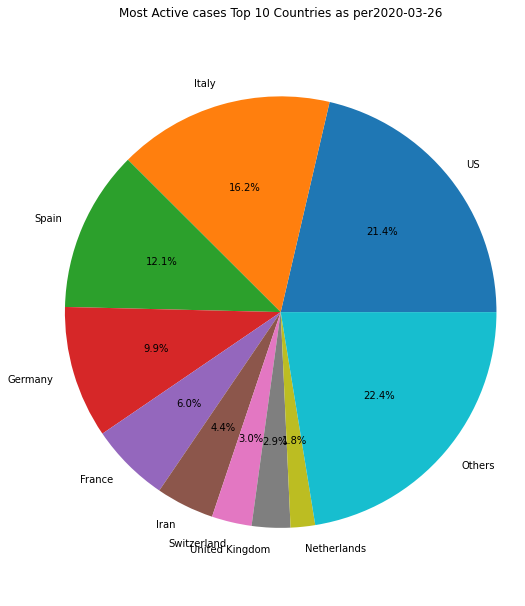

In [43]:
max_latest_country=full_latest_grouped.sort_values(by=["Active"],ascending=[0]).reset_index()


confirmed_pie_val=[]
confirmed_pie_val[0:9]=max_latest_country["Active"][0:9]
confirmed_pie_val.append(max_latest_country["Active"][9:].sum())

confirmed_label_pie=[]
confirmed_label_pie[0:9]=max_latest_country["Country/Region"][0:9]
confirmed_label_pie.append("Others")

fig1,ax1=plt.subplots()
fig1.subplots_adjust(0.9,0,2,2)

actdat=max(full_table['Date'])
print(actdat.date())
plt.title("Most Active cases Top 10 Countries "+"as per "+ str(actdat.date()))
print(max_latest_country.head(10))
#print(max_latest_country)

ax1.pie(confirmed_pie_val,labels=confirmed_label_pie,autopct='%1.1f%%',radius=1500)
ax1.axis('equal')
# plt.show()